# Analiza podatkov o 3050 največjih smučiščih na svetu

Najprej naložimo ustrezne pakete ter razpredelnico, ki jo bomo uporabili za analizo podatkov.

In [287]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
smucisca = pd.read_csv(r'C:\Users\Nejc\AnalizaBesed\ProjektnaNaloga2024\smucisca.csv', index_col='položaj')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 22

# Omogoči celotno širino stolpca
pd.set_option('display.max_colwidth', None)  

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


Spodaj je prikazana razpredelnica, s katero bomo analizirali podatke. Najprej je prikazan položaj smučišča na svetovni lestvici, urejeni po velikosti smučišč. Ta podatek je nastavljen kot indeks. Potem je ime smučišča, celina in država, v kateri se nahaja. Kjer država ni podana, je nastavljena vrednost 'no data'. Sledijo še številski podatki: ocena(od 0 do 5), višinska razlika(izraženo v metrih), podatki o skupni dolžini prog, o dolžini modrih, rdečih in črnih prog posamično(izraženo v kilometrih) in skupno število žičnic. Kjer ni bilo podanega podatka, je nastavljeno na vrednost 'naN'. Pri ruskih smučiščih je ključ 'celina' nastavljena na 'Europe/Asia', saj stran, s katere so ti podatki, ni natančno opredelila, ali se nahaja smučišče na evropskem ali azijskem delu Rusije.

In [288]:
smucisca

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157.0
2,Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165.0
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonnaz/Thyon,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68.0
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70.0
5,Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51.0
...,...,...,...,...,...,...,...,...,...,...
3038,Schwengimatt,Europe,Switzerland,2.2,117.0,1.7,1.0,0.5,0.2,NaN
3038,Siplo,Europe,Norway,2.2,285.0,1.7,0.6,0.4,0.7,2.0
3038,Prácheň,Europe,Czech Republic,2.2,106.0,1.7,0.7,0.6,0.4,NaN


# <h2>1. Posamična analiza</h2>

Najprej so analizirana smučišča posamično. Sprva si bomo ogledali nekaj splošnejših podatkov v razpredelnicah in na grafih, kasneje pa bomo še ugotovili, ali so podane hipoteze pravilne ali ne.

# <h3>1.1 Splošno</h3>

Oglejmo si nekaj podatkov največjega smučišča na svetu.

In [289]:
# najdem smučišče z indeksom 1
najvecje_smucisce_na_svetu = smucisca.loc[int('1')]
print(najvecje_smucisce_na_svetu)


ime                 Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel
celina                                                                   Europe
država                                                                   France
ocena                                                                       4.6
višinska_razlika                                                         2130.0
proge                                                                     600.0
modre                                                                     312.0
rdeče                                                                     216.0
črne                                                                       72.0
žičnice                                                                   157.0
Name: 1, dtype: object


Zanima nas smučišče z največjo višinsko razliko. To višinsko razliko bomo zapisali tudi pod podatki smučišča.

In [290]:
# Pridobimo indeks smučišča z največjo višinsko razliko
indeks_najvecje_visinske_razlike = smucisca['višinska_razlika'].idxmax()  

# Pridobimo vse podatke za to smučišče
smucisce_z_najvecjo_visinsko_razliko = smucisca.loc[indeks_najvecje_visinske_razlike]  

# Izpišemo vse podatke smučišča
print(smucisce_z_najvecjo_visinsko_razliko)
print(f'\nNajvečja višinska razlika je {smucisce_z_najvecjo_visinsko_razliko['višinska_razlika']} metrov.')


ime                 Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn
celina                                                          Europe
država                                                     Switzerland
ocena                                                              4.5
višinska_razlika                                                2337.0
proge                                                            322.0
modre                                                             75.0
rdeče                                                            220.0
črne                                                              27.0
žičnice                                                           51.0
Name: 5, dtype: object

Največja višinska razlika je 2337.0 metrov.


Smiselno bi bilo si ogledati dolžine modrih, rdečih in črnih prog največjih 10 smučišč.

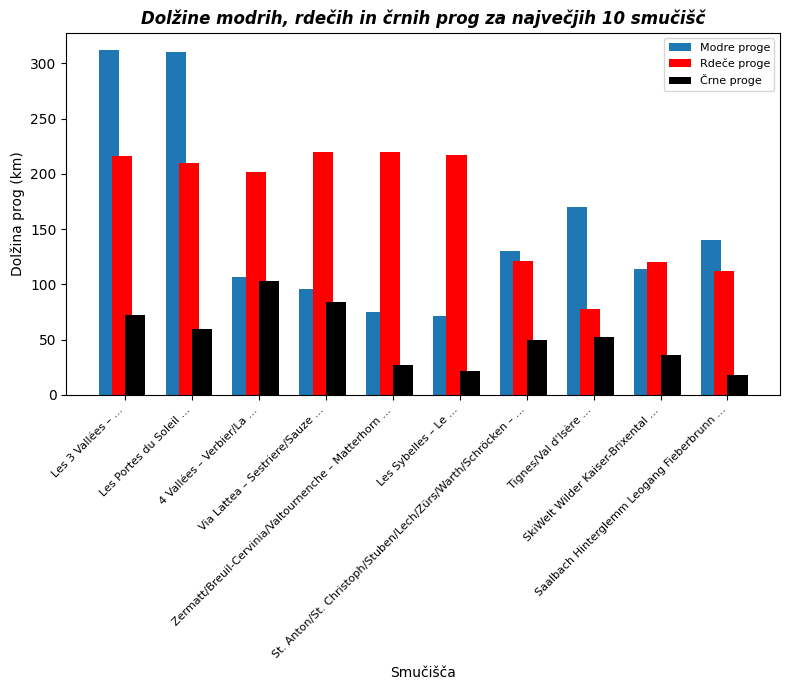

In [291]:
# poiščemo največjih 10 smučišč na svetu
najvecjih_10_smucisc = smucisca.sort_values(by='proge', ascending=False).head(10)

# ustvarimo x-koordinato
x = np.arange(len(najvecjih_10_smucisc))

# velikost
plt.figure(figsize=[8, 7])

# narišemo vse tri stolpce za vsako državo
plt.bar(x, najvecjih_10_smucisc['modre'], color='#1f77b4', width=0.3, label='Modre proge')
plt.bar(x + 0.2, najvecjih_10_smucisc['rdeče'], color='red', width=0.3, label='Rdeče proge')
plt.bar(x + 0.4, najvecjih_10_smucisc['črne'], color='black', width=0.3, label='Črne proge')

# podam imena osi
plt.xlabel('Smučišča', fontsize=10)
plt.ylabel('Dolžina prog (km)', fontsize=10)
plt.title('Dolžine modrih, rdečih in črnih prog za največjih 10 smučišč', fontsize=12, fontweight='bold', fontstyle='italic')

# Oznake na x osi
plt.xticks(x + 0.25, najvecjih_10_smucisc['ime'].str.split().str[:4].str.join(' ') + ' ...', rotation=45, ha='right', fontsize=8)

# Prikaz legende
plt.legend(fontsize=8)

# Prikaz diagrama
plt.tight_layout()
plt.show()


Opazimo, da se največjih 10 smučišč najbolj razlikuje v dolžini modrih prog ter najmanj v dolžini črnih.

Sedaj nas zanima smučišče z največjim deležem najtežjih, torej črnih prog. Prikazali bomo s tortnim diagramom.

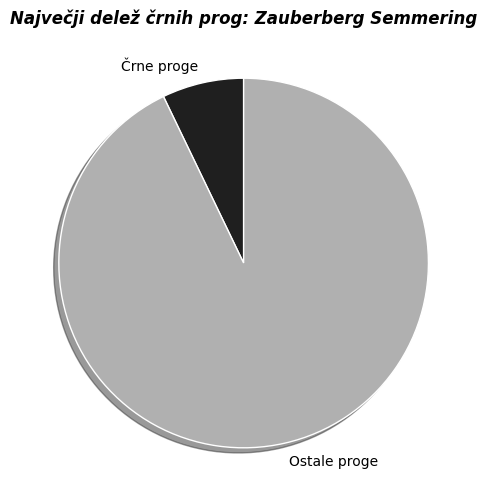

Smučišče z največjim deležem črnih prog je Zauberberg Semmering, ki ima 7.1 % črnih prog.


In [296]:
# izračunajmo najprej delež črnih prog za vsako smučišče
smucisca_copy = smucisca.copy()
smucisca_copy['% črnih prog'] = (smucisca_copy['črne'] / smucisca_copy['proge']) * 100

# poiščemo to smučišče
najvecji_delez_crnih_prog = smucisca_copy.iloc[smucisca_copy['% črnih prog'].idxmax()]
smucisce_z_najvec_crnimi_progami = najvecji_delez_crnih_prog['ime']
delez_crnih_procent = najvecji_delez_crnih_prog['% črnih prog']

# priprava podatkov
labels = ['Črne proge', 'Ostale proge']
sizes = [delez_crnih_procent, 100 - delez_crnih_procent]
colors = ['#1f1f1f', '#b0b0b0']  

# nastavitve grafa
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, shadow=True, pctdistance=0.5, wedgeprops={'edgecolor': 'white'})
plt.title(f'Največji delež črnih prog: {smucisce_z_najvec_crnimi_progami}', fontsize=12, fontweight='bold', style='italic')
plt.show()

print(f"Smučišče z največjim deležem črnih prog je {smucisce_z_najvec_crnimi_progami}, ki ima {delez_crnih_procent:.1f} % črnih prog.")


Sedaj bomo to naredili splošneje; za vsako vrsto prog in za vsako smučišče bomo poiskali, kolikšen procent skupne dolžine prog zajemajo ter jih uredili najprej po deležu črnih, nato rdečih in na koncu še modrih. Rezultate bomo prikazali v razpredelnici.

In [301]:
# izračunajmo delež modrih in rdečih prog, za črne proge pa že imamo
smucisca_copy['% modre proge'] = (smucisca_copy['modre'] / smucisca_copy['proge']) * 100
smucisca_copy['% rdeče proge'] = (smucisca_copy['rdeče'] / smucisca_copy['proge']) * 100

# za lažjo obdelavo kopiram smucisca in izbrisem vrstice s kakšno vrednostjo naN
smucisca_pociscena_naN = smucisca_copy.dropna(subset=['modre', 'rdeče', 'črne', '% črnih prog', '% rdeče proge', '% modre proge'])

# urejanje po deležu črnih, rdečih in na koncu modrih
urejena_smucisca_brez_naN = smucisca_pociscena_naN.sort_values(by=['% črnih prog', '% rdeče proge', '% modre proge'], ascending=False)

# katere stolpce bomo prikazali
rezultat1 = urejena_smucisca_brez_naN[['ime', '% modre proge', '% rdeče proge', '% črnih prog']].copy()

# zaokrožimo procentne vrednosti na 2 decimalni mesti
rezultat1['% modre proge'] = rezultat1['% modre proge'].round(1)
rezultat1['% rdeče proge'] = rezultat1['% rdeče proge'].round(1)
rezultat1['% črnih prog'] = rezultat1['% črnih prog'].round(1)

# indeks
rezultat1.index = range(1, len(rezultat1) + 1)

rezultat1.head(10)


,ime,% modre proge,% rdeče proge,% črnih prog
1,Balea Lac,0.0,0.0,100.0
2,Laber – Oberammergau,0.0,0.0,100.0
3,Kasprowy Wierch – Zakopane,0.0,0.0,100.0
4,Wallberg – Rottach-Egern,0.0,0.0,100.0
5,Crni vrh – Bor,0.0,16.7,83.3
6,Mt. Bohemia,0.0,23.1,76.9
7,Alpental,5.2,24.0,70.8
8,Gulmarg (Kongdoori-Apharwat),10.0,20.0,70.0
9,Crabbe Mountain,20.0,10.0,70.0
10,Jiudingshan Taiziling,30.8,0.0,69.2


# <h3>1.2 Hipoteze in ugotovitve</h3>

Hipoteza 1: število žičnic se z večanjem višinske razlike povečuje. Poglejmo si na grafu.

Hipoteza 2: Proge z oceno, višjo ali enako 4.0, so dolge vsaj 50 kilometrov.

Hipoteza 3: Ocena smučišč je neodvisna od višinske razlike.

# <h3>1.1 Celine</h3>


Najprej bomo analizirali smučarske centre po celinah.

Opazimo lahko, da je celina z največ smučišči Evropa. Po številu teh močno izstopa, saj jih ima več kot ostale celine skupno. Celina z najmanj smučišči pa je Afrika. To je pričakovano zaradi nižje razvitosti in visokih temperatur.

Tu je prikazano nekaj največjih smučišč iz Evrope ter vsa iz Afrike. Opazimo, da so največja smučišča sveta vsa v Evropi ter da so Afriška izredno kratka.

In [ ]:
smucisca[smucisca['celina'] == 'Europe/Asia'][['ime', 'proge']].head(60)


In [ ]:
smucisca[smucisca['celina'] == 'Africa'][['ime', 'proge']]

# <h3>1.2 Države</h3>


Za začetek tega razdelka si oglejmo države z največ registriranimi smučišči. Prikazano je tudi v obliki stolpičnega diagrama.

In [ ]:
# preštejemo smučišča za vsako državo
smucisca_po_drzavah = smucisca.groupby('država').size().reset_index(name='število_smučišč')

# uredimo po številu smučišč od največ do najmanj
smucisca_po_drzavah = smucisca_po_drzavah.sort_values(by='število_smučišč', ascending=False)

# nastavimo indeks
smucisca_po_drzavah.reset_index(drop=True, inplace=True)
smucisca_po_drzavah.index += 1  # Indeks začne od 1

# prikažemo prvih 10 držav
najvec_smucisc = smucisca_po_drzavah.head(10)
najvec_smucisc


In [ ]:
# ustvarimo stolpični diagram
plt.bar(najvec_smucisc['država'], najvec_smucisc['število_smučišč'], color='turquoise')

# dodamo oznake in naslov
plt.xlabel('Država')
plt.ylabel('Število smučišč')
plt.title('Top 10 držav po številu smučišč')

# rotiramo oznake na x-osi
plt.xticks(rotation=45)
plt.figure(figsize=(10, 6))
plt.show()

Sedaj nas zanimajo države z najdaljšo skupno dolžino smučarskih prog.

In [ ]:
# skupna dolžina prog po državah
dolzina_prog_po_drzavah = smucisca.groupby('država')['proge'].sum()

# uredimo po skupni dolžini prog od največ do najmanj
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.sort_values(ascending=False)

# nastavimo indeks, da začne od 1
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.reset_index()
dolzina_prog_po_drzavah.index += 1  

najdaljse_dolzina = dolzina_prog_po_drzavah.head(10)
najdaljse_dolzina



In [ ]:
plt.plot(najdaljse_dolzina['država'], najdaljse_dolzina['proge'], marker='o', color='gray')
plt.title('Skupna dolžina smučarskih prog po državah')
plt.xlabel('Država')
plt.ylabel('Skupna dolžina prog (v km)')
plt.xticks(rotation=45)
plt.show()


Sedaj, ko imamo top 10 držav po skupni dolžini smučarskih prog, si oglejmo, kolikšen je njihov delež modrih, rdečih in črnih prog posamično.

Če primerjamo ta dva grafa, opazimo, da imajo ZDA največ smučišč in najdaljšo skupno dolžino prog, Francija pa ima manj zelo dolgih smučišč, saj je po številu smučišč šele na 6. mestu, po dolžini prog pa se nahaja tik za ZDA.

Naslednji podatek, ki si ga bomo ogledali, je tak, da koristi najizkušenejšim smučarjem. Ogledali si bomo namreč seznam držav z največ najzahtevnejšimi progami, torej črnimi. Hkrati pa bomo še preračunali, kolikšen procent vseh prog zavzemajo najtežje.

Za manj izkušene smučarje še sedaj podatke o lažjih, torej modrih in rdečih progah.

# <h3>1.3 Slovenska smučišča</h3>


_V tem razdelku bom natančno obdelal podatke o smučiščih, izključno v Sloveniji. Ker je teh zelo malo, bo analiza kratka._

Najprej je prikazana razpredelnica slovenskih smučišč.

In [ ]:
slovenska_smucisca = smucisca[smucisca['država']== 'Slovenia']
slovenska_smucisca.head(22)

In [ ]:
print(f'V Sloveniji imamo {len(slovenska_smucisca)} registriranih smučišč.')

Opazimo, da je največje slovensko smučišče Mariborsko pohorje.

Oglejmo si razvrstitev slovenskih smučišč po oceni.

In [ ]:
najbolje_ocenjeno_slovensko = slovenska_smucisca.sort_values('ocena', ascending=False)
najbolje_ocenjeno_slovensko

Poglejmo si sedaj, če ima morda dolžina prog kakšno povezavo z oceno smučišča.

In [ ]:
# narišimo scatter plot
plt.scatter(slovenska_smucisca['proge'], slovenska_smucisca['ocena'])
plt.title('Povezava med dolžino prog in oceno smučišča')
plt.xlabel('Dolžina prog (km)')
plt.ylabel('Ocena smučišča')
plt.show()

Povezava med tema podatkoma je vsaj delno vidna. Kjer je dolžina prog manjša od 10 kilometrov, so vse ocene smučišč pod 3. Pri večjih smučiščih pa so vidne tudi višje ocene, večinoma nad 3, z izjemo dveh z 2.8.

In [ ]:
# Skupini po višinski razliki in izračunaj povprečje števila žičnic
povprecje_zičnic = slovenska_smucisca.groupby('višinska_razlika')['žičnice'].mean(numeric_only=True)

# Nariši graf
povprecje_zičnic.plot(kind='bar')
plt.title('Povprečje števila žičnic glede na višinsko razliko')
plt.xlabel('Višinska razlika (m)')
plt.ylabel('Povprečno število žičnic')
plt.show()



Ta stolpični prikaz daje podatke o spreminjaju števila žičnic glede na višinsko razliko. Kot je pričakovano, je z večjo višinsko razliko tudi več žičnic.

Hipoteza 1: Slovenska smučišča so slabše ocenjena od smučišč sosednje Avstrije in Italije.

# <h2>3. Grafični prikaz in razni izračuni</h2>